In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pprint
from datetime import datetime, timedelta
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 2000)

In [ ]:
import requests

url = "https://yahoo-finance97.p.rapidapi.com/stock-info"

payload = "symbol=AAPL"
headers = {
	"content-type": "application/x-www-form-urlencoded",
	"X-RapidAPI-Key": "YOUR API KEY",
	"X-RapidAPI-Host": "yahoo-finance97.p.rapidapi.com"
}

response = requests.request("POST", url, data=payload, headers=headers)
data = json.loads(response.text)

print(response.status_code)

pprint.pprint (data)

200
{'data': {'52WeekChange': None,
          'SandP52WeekChange': None,
          'address1': 'One Apple Park Way',
          'algorithm': None,
          'annualHoldingsTurnover': None,
          'annualReportExpenseRatio': None,
          'ask': 151.12,
          'askSize': 1200,
          'averageDailyVolume10Day': 81965800,
          'averageVolume': 82245757,
          'averageVolume10days': 81965800,
          'beta': 1.19455,
          'beta3Year': None,
          'bid': 150.71,
          'bidSize': 1100,
          'bookValue': 4.146,
          'category': None,
          'circulatingSupply': None,
          'city': 'Cupertino',
          'companyOfficers': [],
          'country': 'United States',
          'currency': 'USD',
          'currentPrice': 149.8,
          'currentRatio': 0.865,
          'dateShortInterest': 1657843200,
          'dayHigh': 151.32,
          'dayLow': 149.63,
          'debtToEquity': 205.984,
          'dividendRate': 0.92,
          'dividendYie

In [ ]:
def get_stock_info():
  url = "https://yahoo-finance97.p.rapidapi.com/stock-info"

  payload = "symbol=AAPL"
  headers = {
    "content-type": "application/x-www-form-urlencoded",
    "X-RapidAPI-Key": "YOUR API KEY",
    "X-RapidAPI-Host": "yahoo-finance97.p.rapidapi.com"
  }

  response = requests.request("POST", url, data=payload, headers=headers)
  data = json.loads(response.text)

  return (data, response.status_code)

def get_earnings():
  url = "https://yahoo-finance97.p.rapidapi.com/earnings"

  payload = "symbol=AAPL"
  headers = {
    "content-type": "application/x-www-form-urlencoded",
    "X-RapidAPI-Key": "YOUR API KEY",
    "X-RapidAPI-Host": "yahoo-finance97.p.rapidapi.com"
  }

  response = requests.request("POST", url, data=payload, headers=headers)
  data = json.loads(response.text)

  return (data, response.status_code)

def get_financials():
  url = "https://yahoo-finance97.p.rapidapi.com/financials"

  payload = "symbol=AAPL"
  headers = {
    "content-type": "application/x-www-form-urlencoded",
    "X-RapidAPI-Key": "YOUR API KEY",
    "X-RapidAPI-Host": "yahoo-finance97.p.rapidapi.com"
  }

  response = requests.request("POST", url, data=payload, headers=headers)
  data = json.loads(response.text)

  return (data, response.status_code)

def get_calendar():
  url = "https://yahoo-finance97.p.rapidapi.com/calendar"

  payload = "symbol=AAPL"
  headers = {
    "content-type": "application/x-www-form-urlencoded",
    "X-RapidAPI-Key": "YOUR API KEY",
    "X-RapidAPI-Host": "yahoo-finance97.p.rapidapi.com"
  }

  response = requests.request("POST", url, data=payload, headers=headers)
  data = json.loads(response.text)

  return (data, response.status_code)

def get_quarterly_earnings():
  url = "https://yahoo-finance97.p.rapidapi.com/quarterly-earnings"

  payload = "symbol=AAPL"
  headers = {
    "content-type": "application/x-www-form-urlencoded",
    "X-RapidAPI-Key": "YOUR API KEY",
    "X-RapidAPI-Host": "yahoo-finance97.p.rapidapi.com"
  }

  response = requests.request("POST", url, data=payload, headers=headers)
  data = json.loads(response.text)

  return (data, response.status_code)

# 2. Parsing extracted JSON data

In [ ]:
%%time
stock_info_data,stock_info_code = get_stock_info()

CPU times: user 14.3 ms, sys: 703 µs, total: 15 ms
Wall time: 68 ms


In [ ]:
%%time
earnings_data,earnings_code = get_earnings()

CPU times: user 32.4 ms, sys: 3.13 ms, total: 35.5 ms
Wall time: 3.13 s


In [ ]:
%%time
financials_data,financials_code = get_financials()

CPU times: user 32.6 ms, sys: 4.11 ms, total: 36.7 ms
Wall time: 4.27 s


In [ ]:
%%time
quarterly_earnings_data, quarterly_earnings_code = get_quarterly_earnings()

CPU times: user 30.6 ms, sys: 4.25 ms, total: 34.9 ms
Wall time: 3.41 s


### 2.1 Stock price

In [ ]:
print ("Stock price:",stock_info_data['data']['currentPrice'])

Stock price: 150.11


### 2.2 Market cap

In [ ]:
print ("Market cap (billions $):",str(np.round(stock_info_data['data']['marketCap']/1000000000,2)) + 'B')

Market cap (billions $): 2462.68B


### 2.3 P/E ratio

In [ ]:
print ("Trailing P/E ratio:",stock_info_data['data']['trailingPE'])
print ("Forward P/E ratio:",stock_info_data['data']['forwardPE'])

Trailing P/E ratio: 33.739044
Forward P/E ratio: 28.26836


### 2.4 Revenue



In [ ]:
pprint.pprint(earnings_data)

{'data': [{'Earnings': 59531000000, 'Revenue': 265595000000, 'Year': 2018},
          {'Earnings': 55256000000, 'Revenue': 260174000000, 'Year': 2019},
          {'Earnings': 57411000000, 'Revenue': 274515000000, 'Year': 2020},
          {'Earnings': 94680000000, 'Revenue': 365817000000, 'Year': 2021}],
 'message': 'Success',
 'status': 200}


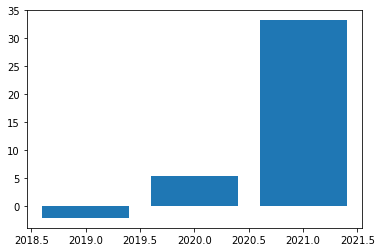

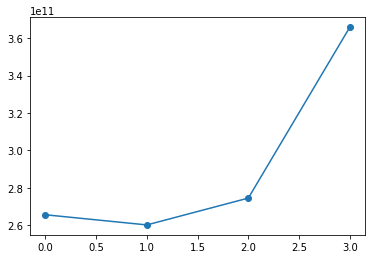

In [ ]:
revenue = []
rev_growth = []
year = []
count = 0

for yearly_rev in earnings_data['data']:
  revenue.append(yearly_rev['Revenue'])
  year.append(yearly_rev['Year'])
  if count == 0:
    pass
  else: 
    rev_growth.append(((revenue[-1] - revenue[-2])/revenue[-2])*100)
  count = count + 1

year = year[1:]

plt.figure()
plt.bar(year,rev_growth)

plt.figure()
plt.plot(revenue,marker='o')

### Operating Margin (%)

In [ ]:
print ("Operating margin (%):",np.round(stock_info_data['data']['operatingMargins']*100,2))

Operating margin (%): 30.53


### 2.5 Profit margin

In [ ]:
print ("Profit margin (%):",np.round(stock_info_data['data']['profitMargins']*100,2))

Profit margin (%): 25.71


### 2.6 Cash on hand

In [ ]:
print ("Total cash (billions $):",int(stock_info_data['data']['totalCash']/1000000000))

Total cash (billions $): 48


### 2.7 Debt

In [ ]:
print ("Total debt (billions $):",int(stock_info_data['data']['totalDebt']/1000000000))

Total debt (billions $): 119


### 2.8 Cash flow

In [ ]:
print ("Operating cash flow (billions $):",int(stock_info_data['data']['operatingCashflow']/1000000000))
print ("Free cash flow (billions $):",int(stock_info_data['data']['freeCashflow']/1000000000))

Operating cash flow (billions $): 118
Free cash flow (billions $): 83


### 2.9 EBITDA

In [ ]:
print ("EBITDA:",stock_info_data['data']['ebitda'])

EBITDA: 129556996096


### 2.10 Current quarter

In [ ]:
prev_quarter = quarterly_earnings_data['data'][-1]['Quarter']
print ('Previous quarter:','Q' + prev_quarter[0])

curr_quarter = pd.to_datetime(prev_quarter) + timedelta(days = 100)
print ('Current quarter:','Q' + str(curr_quarter.quarter))

next_quarter = curr_quarter + timedelta(days = 100)
print ('Next quarter:','Q' + str(next_quarter.quarter))

Previous quarter: Q2
Current quarter: Q3
Next quarter: Q4


### 2.12 Previous year profit (earnings) 

In [ ]:
print ('Current year earnings ($):',earnings_data['data'][-1]['Earnings'])

Current year earnings ($): 94680000000


### 2.13 Dividend Yield

In [ ]:
print ('Dividend Yield ($):',stock_info_data['data']['dividendYield']*100)

Dividend Yield ($): 0.5700000000000001


### 2.14 Price to Book Ratio (P/B)



In [ ]:
print ("Price to Book Ratio:",np.round(stock_info_data['data']['priceToBook']))

Price to Book Ratio: 36.0


### 2.15 P/E to Growth Ratio (PEG)

In [ ]:
print ("P/E to Growth Ratio:",np.round(stock_info_data['data']['pegRatio']))

P/E to Growth Ratio: 3.0


### 2.16 Debt to Equity Ratio (D/E)

In [ ]:
print ("Debt To Equity Ratio:",stock_info_data['data']['debtToEquity'])

Debt To Equity Ratio: 205.984


### 2.17 Company name

In [ ]:
print ("Company name:",stock_info_data['data']['longName'])

Company name: Apple Inc.


### 2.18 EPS

In [ ]:
print ("Trailing EPS:",stock_info_data['data']['trailingEps'])
print ("Forward EPS:",stock_info_data['data']['forwardEps'])

Trailing EPS: 4.449
Forward EPS: 5.31


### 2.19 Return on Equity (ROE)

In [ ]:
print ("Return on Equity (%):",np.round(stock_info_data['data']['returnOnEquity']*100,2))

Return on Equity (%): 162.82


### 2.20 Return on Assets (ROA)

In [ ]:
print ("Return on Assets (%):",np.round(stock_info_data['data']['returnOnAssets']*100,2))

Return on Assets (%): 22.2
